## Problem

Do the following on titanic dataset
1. Load the dataset into python environment
2. Do all the necessary pre-processing steps
3. Create kNN and SVM models
4. Do k-fold and stratified stratified k-fold cross validation techniques and find the
average accuracy score of the models

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
data = pd.read_csv("titanic_dataset .csv")
#checking the data
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It is found that there are 12 columns in the given dataset

### EDA

<Axes: xlabel='Age', ylabel='Density'>

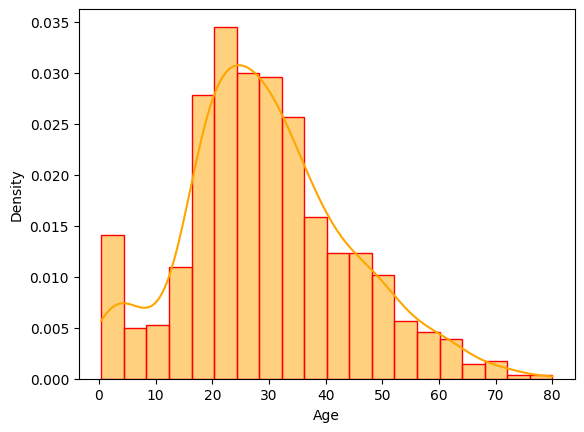

In [4]:
# checking the various values of Age column with histogram
sns.histplot(data.Age, stat="density", kde=True, color='orange', edgecolor='red')

Most of the Age group is between 15 and 35

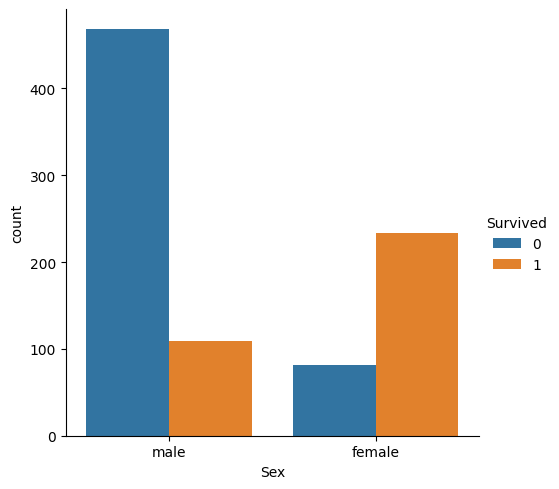

In [5]:
# creating a catplot of Sex and survived columns
sns.catplot(x="Sex",hue="Survived", data=data, kind="count");

Most of the survivors are female and most of the deceased are male

In [6]:
data.Fare.value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [7]:
# splitting the fare data into 4 equal bins 
fare_bin = pd.qcut(data.Fare, 4)
fare_bin

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

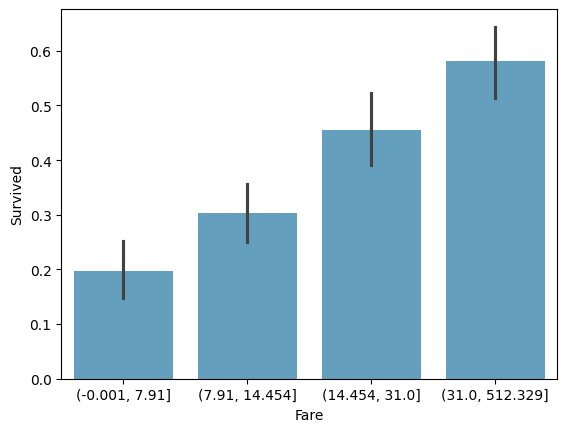

In [8]:
# creating a barplot to compare fare and survived
sns.set_palette("icefire")
sns.barplot(x=fare_bin,y="Survived", data=data)
plt.show()


most of the survivors have paid high fare for embarking the ship

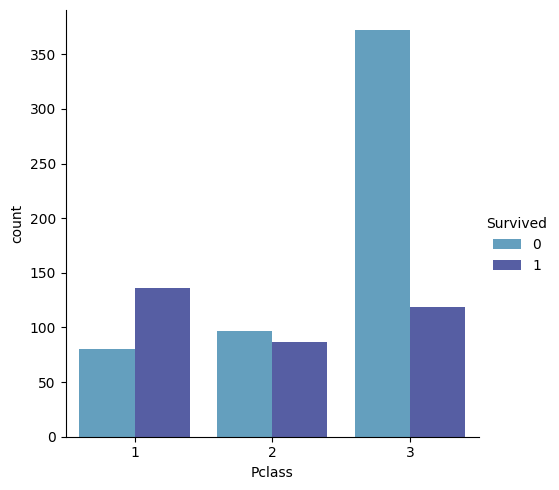

In [9]:
# creating a catplot of Pclass and survived columns
sns.catplot(x="Pclass",hue="Survived", data=data, kind="count");

pclass 3 has highest amount of deceased followed by pclass 2 

In [10]:
#finding the chance of survival for each class
survival_percentage_class_1=data[(data.Pclass == 1) & (data.Survived == 1)].Pclass.value_counts() / data[data.Pclass==1].Pclass.value_counts()

In [11]:
survival_percentage_class_2=data[(data.Pclass == 2) & (data.Survived == 1)].Pclass.value_counts() / data[data.Pclass==2].Pclass.value_counts()

In [12]:
survival_percentage_class_3=data[(data.Pclass == 3) & (data.Survived == 1)].Pclass.value_counts() / data[data.Pclass==3].Pclass.value_counts()

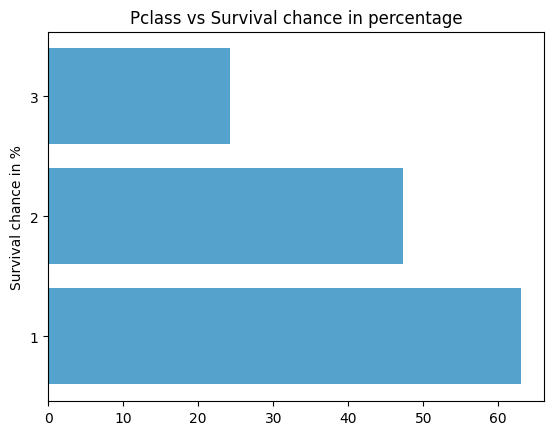

In [13]:
plt.barh([1,2,3],
[survival_percentage_class_1[1] * 100,survival_percentage_class_2[2] * 100, survival_percentage_class_3[3] * 100])
plt.ylabel("Pclass")
plt.ylabel("Survival chance in %")
plt.title("Pclass vs Survival chance in percentage")
plt.yticks([1,2,3])
plt.show()

* `Pclass 1` has more than 60% chance of survival
* `Pclass 2` has around 50% chance of survival
* `Pclass 3` had around 25% chance of survival

### Preprocessing

**Null Value Handling**

In [14]:
# checking for null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values in the Age, Cabin and Embarked columns

In [15]:
data.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [16]:
# checking the skewness of Age
data.Age.skew()

0.38910778230082704

Age is slightly positively skewed so filling nan values with median 

In [17]:
data.Age.fillna(data.Age.median(), inplace=True)

/var/folders/js/bv10kzf92wlfc8gm5ydhlvdw0000gn/T/ipykernel_2789/627151932.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Age.fillna(data.Age.median(), inplace=True)


In [18]:
# cheking if the null values filled are reflecting in the dataset
data.Age.isna().sum()

0

In [19]:
# checking the total number of null values in Cabin column
data.Cabin.isna().sum()

687

In [20]:
#checking for non null value counts in cabin column
data.Cabin.value_counts().sum()

204

In [21]:
data.Cabin.isna().sum()/data.shape[0] * 100

77.10437710437711

more than 75% of the Cabin column are null values so dropping the column

In [22]:
data.drop('Cabin',axis=1, inplace=True)

In [23]:
#checking the unique values of embarked column
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
#checking the mode of Embarked column
data.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [25]:
#filling na values with mode
data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)


/var/folders/js/bv10kzf92wlfc8gm5ydhlvdw0000gn/T/ipykernel_2789/1287863112.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)


In [26]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

> Dropping PassengerId, Name, Ticket columns. Since they are not significant for modelling

In [27]:
data.drop(['Name','PassengerId','Ticket'], axis=1, inplace=True)

In [28]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Outlier Detection

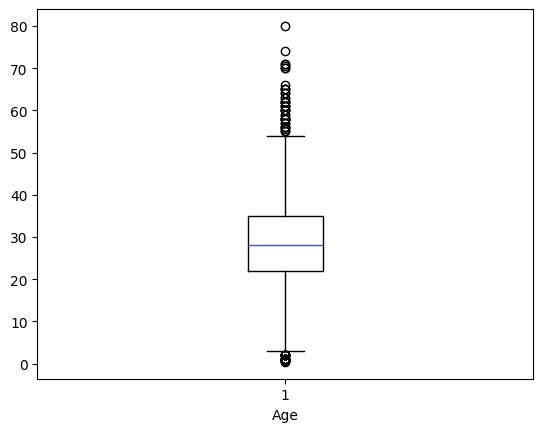

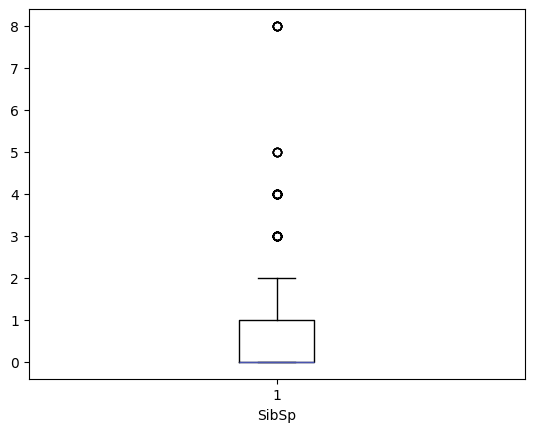

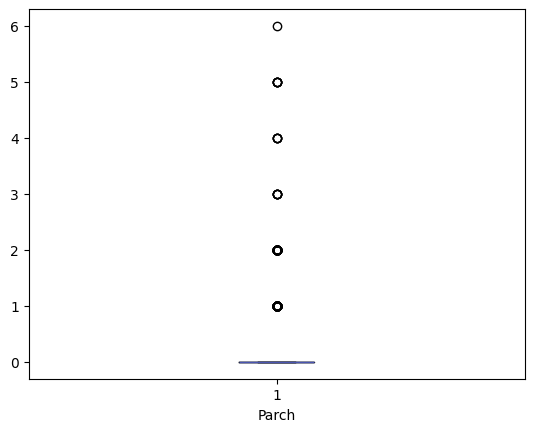

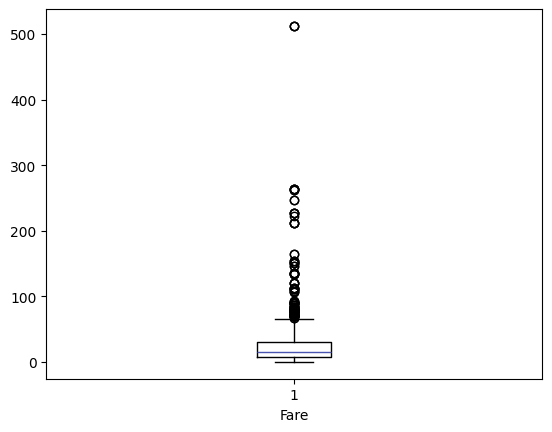

In [29]:
for column in ['Age','SibSp','Parch','Fare']:
    plt.boxplot(data[column])
    plt.xlabel(column)
    plt.show()

The columns Fare and Age have a Significant number of outliers

<Axes: >

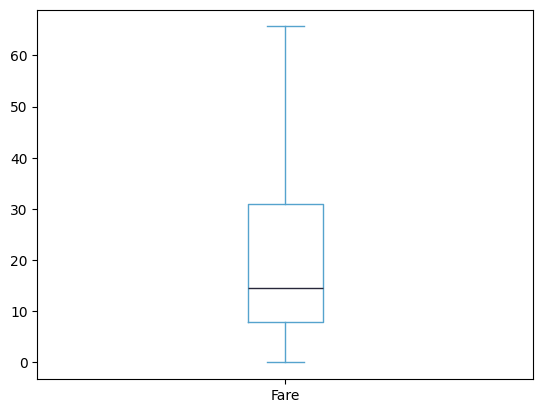

In [30]:
# using IQR method handling the outliers
Q1 = data.Fare.quantile(0.25)
Q3 = data.Fare.quantile(0.75)
IQR = Q3-Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# applying the treatment on the column
data.Fare = np.where(data.Fare > upper_whisker, upper_whisker,
np.where(data.Fare < lower_whisker, lower_whisker,data.Fare))
#checking the boxplot again
data.Fare.plot(kind="box")

<Axes: >

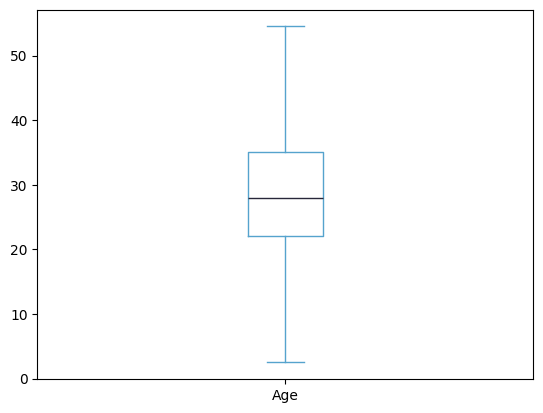

In [31]:
# using IQR method for handling outlier in Age column
Q1 = data.Age.quantile(0.25)
Q3 = data.Age.quantile(0.75)

IQR = Q3-Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

#applying the treatment on Age column

data.Age = np.where(data.Age > upper_whisker, upper_whisker,
np.where(data.Age < lower_whisker, lower_whisker,data.Age))

#checking boxplot
data.Age.plot(kind="box")

### Encoding and Scaling

In [32]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [33]:
# splitting the data into targets and features
X = data.drop('Survived', axis=1)
y = data.Survived
#checking shape of X and y
X.shape,y.shape

((891, 7), (891,))

In [34]:
X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [35]:
# using label encoder to encode categorical values
from sklearn.preprocessing import LabelEncoder
for column in ['Sex','Embarked']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,65.6344,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [36]:
# scaling the columns
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max.fit(X)
scaled_data = min_max.transform(X)

scaled_X = pd.DataFrame(scaled_data, columns=X.columns)
scaled_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.375000,0.125,0.0,0.110460,1.0
1,0.0,0.0,0.682692,0.125,0.0,1.000000,0.0
2,1.0,0.0,0.451923,0.000,0.0,0.120745,1.0
3,0.0,0.0,0.625000,0.125,0.0,0.809027,1.0
4,1.0,1.0,0.625000,0.000,0.0,0.122649,1.0


### Modelling

In [37]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [38]:

#svm
from sklearn.svm import SVC
svc = SVC()


> Since the cross_val_score() of the scikitlearn does the fitting and prediction of the model we will not be doing those

### Cross Validation

In [39]:

#calculating KFold crossval score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#doing a 5 fold cross validation
kfold = KFold(n_splits=5)
#caculating cross val score of knn with 5 fold cross validation
knn_scores = cross_val_score(knn, scaled_X,y,cv=kfold)
knn_scores

array([0.7877095 , 0.79213483, 0.80898876, 0.80337079, 0.82022472])

In [40]:
# calculating svm crossval score with 5 fold Kfold
svc_scores = cross_val_score(svc,scaled_X,y,cv=kfold)
svc_scores

array([0.83240223, 0.80337079, 0.79775281, 0.76966292, 0.83707865])

In [41]:
# calculating the average for each
print(f"Average 5 Fold Cross Validated Accuracy of SVC : {np.mean(svc_scores)}")
print(f"Average 5 Fold Cross Validated Accuracy of KNN : {np.mean(knn_scores)}")

Average 5 Fold Cross Validated Accuracy of SVC : 0.8080534806352395
Average 5 Fold Cross Validated Accuracy of KNN : 0.80248571966606


In [42]:
# Doing a stratified KFold 
from sklearn.model_selection import StratifiedKFold

#choosing number of splits as 5
stratified_kfold = StratifiedKFold(n_splits=5)

#calculating crossval score of knn
knn_strata_scores = cross_val_score(knn, scaled_X,y, cv=stratified_kfold)

knn_strata_scores

array([0.7877095 , 0.76966292, 0.81460674, 0.82022472, 0.80337079])

In [43]:
# calculating crossval score of svc
svc_strata_scores = cross_val_score(svc, scaled_X,y, cv=stratified_kfold)
svc_strata_scores

array([0.80446927, 0.80898876, 0.80337079, 0.78651685, 0.82022472])

In [44]:
# calculating the average for each
print(f"Average 5 Fold Stratified Cross Validated Accuracy of SVC : {np.mean(svc_strata_scores)}")
print(f"Average 5 Fold Stratified Cross Validated Accuracy of KNN : {np.mean(knn_strata_scores)}")

Average 5 Fold Stratified Cross Validated Accuracy of SVC : 0.8047140794677045
Average 5 Fold Stratified Cross Validated Accuracy of KNN : 0.799114933149206
